## Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Loading the data 

In [2]:
df = pd.read_excel("Attribute DataSet.xlsx")
df.head()

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        500 non-null    int64  
 1   Style           500 non-null    object 
 2   Price           498 non-null    object 
 3   Rating          500 non-null    float64
 4   Size            500 non-null    object 
 5   Season          498 non-null    object 
 6   NeckLine        497 non-null    object 
 7   SleeveLength    498 non-null    object 
 8   waiseline       413 non-null    object 
 9   Material        372 non-null    object 
 10  FabricType      234 non-null    object 
 11  Decoration      264 non-null    object 
 12  Pattern Type    391 non-null    object 
 13  Recommendation  500 non-null    int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 54.8+ KB


In [20]:
df.describe()

,Dress_ID,Rating,Recommendation
count,5.000000e+02,500.000000,500.000000
mean,9.055417e+08,3.528600,0.420000
std,1.736190e+08,2.005364,0.494053
min,4.442820e+08,0.000000,0.000000
25%,7.673164e+08,3.700000,0.000000
50%,9.083296e+08,4.600000,0.000000
75%,1.039534e+09,4.800000,1.000000
max,1.253973e+09,5.000000,1.000000


In [4]:
 missing_values = df.isnull().sum()/len(df)*100
print(missing_values)

Dress_ID           0.0
Style              0.0
Price              0.4
Rating             0.0
Size               0.0
Season             0.4
NeckLine           0.6
SleeveLength       0.4
waiseline         17.4
Material          25.6
FabricType        53.2
Decoration        47.2
Pattern Type      21.8
Recommendation     0.0
dtype: float64


## Distribution of the Target variable (Rating)

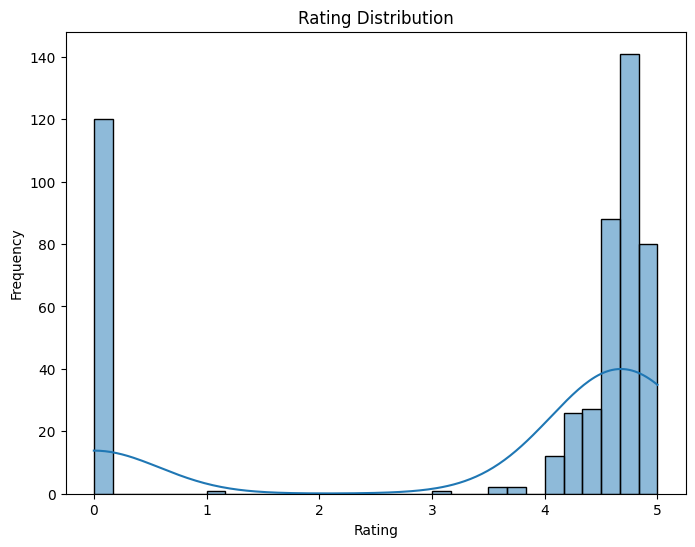

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating'].dropna(), kde=True, bins=30)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [5]:
# we set the Threshold in whicht more then  50% missing value are drop
threshold = 50
columns_to_drop = missing_values[missing_values > threshold].index
df2 = df.drop(columns=columns_to_drop)


In [6]:
df2.isnull().sum()/len(df2)*100

Dress_ID           0.0
Style              0.0
Price              0.4
Rating             0.0
Size               0.0
Season             0.4
NeckLine           0.6
SleeveLength       0.4
waiseline         17.4
Material          25.6
Decoration        47.2
Pattern Type      21.8
Recommendation     0.0
dtype: float64

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        500 non-null    int64  
 1   Style           500 non-null    object 
 2   Price           498 non-null    object 
 3   Rating          500 non-null    float64
 4   Size            500 non-null    object 
 5   Season          498 non-null    object 
 6   NeckLine        497 non-null    object 
 7   SleeveLength    498 non-null    object 
 8   waiseline       413 non-null    object 
 9   Material        372 non-null    object 
 10  Decoration      264 non-null    object 
 11  Pattern Type    391 non-null    object 
 12  Recommendation  500 non-null    int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 50.9+ KB


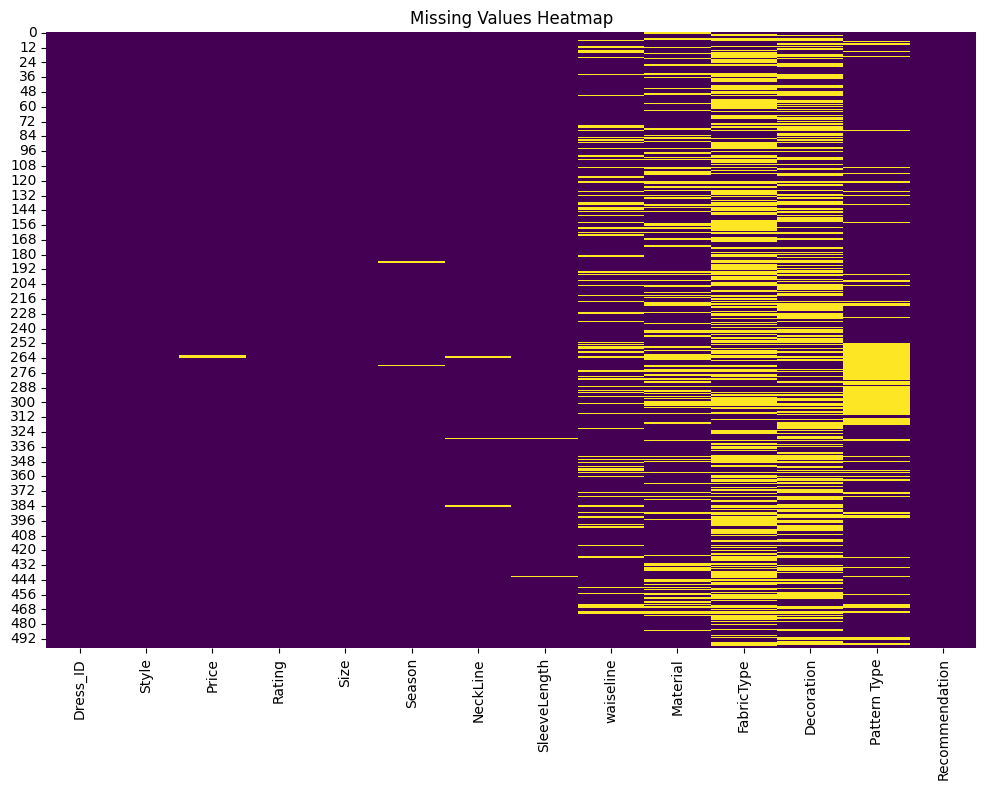

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## Change the Categorical variable into Numaric

In [9]:
# Encode categorical variables
label_encoders = {}
for column in ['Style', 'Price', 'Size', 'Season', 'NeckLine', 'SleeveLength', 'waiseline', 'Material', 'Decoration', 'Pattern Type']:
    le = LabelEncoder()
    df2[column] = le.fit_transform(df2[column].astype(str))
    label_encoders[column] = le


## Missing values imputing

In [10]:
# Imputing missing values
imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(df2)

# Decoding back to original categories
#df2['column_name'] = encoder.inverse_transform(data_imputed)


In [11]:
df2.isnull().sum()/len(df2)*100

Dress_ID          0.0
Style             0.0
Price             0.0
Rating            0.0
Size              0.0
Season            0.0
NeckLine          0.0
SleeveLength      0.0
waiseline         0.0
Material          0.0
Decoration        0.0
Pattern Type      0.0
Recommendation    0.0
dtype: float64

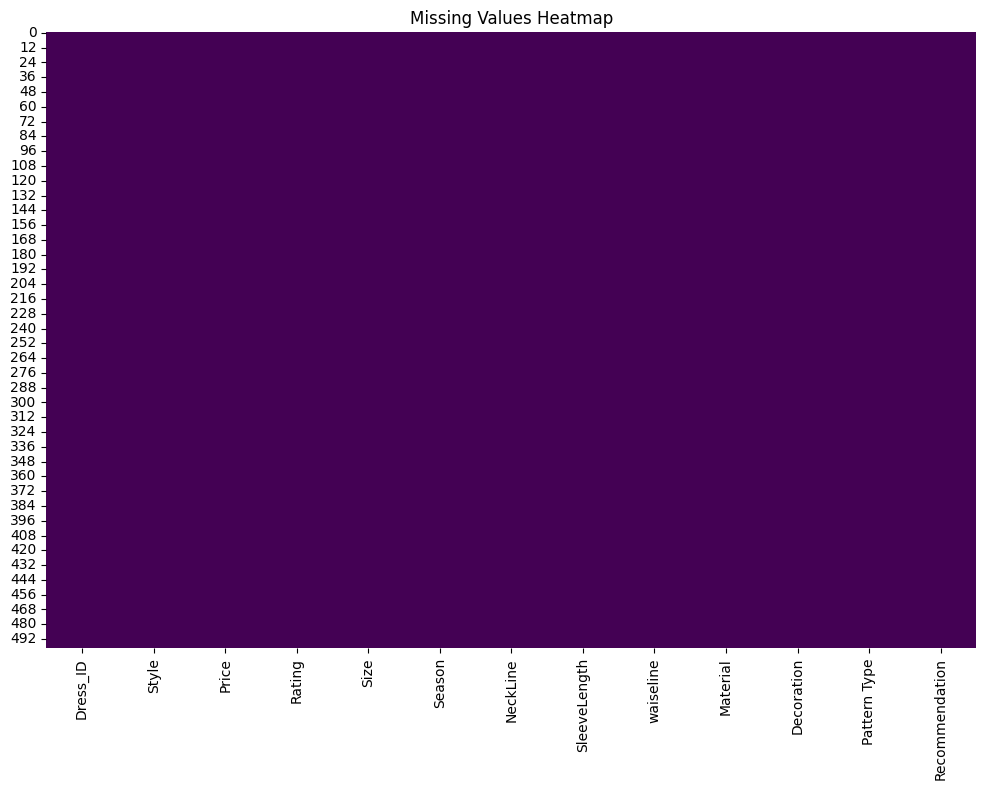

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df2.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## Correlation Heatmap

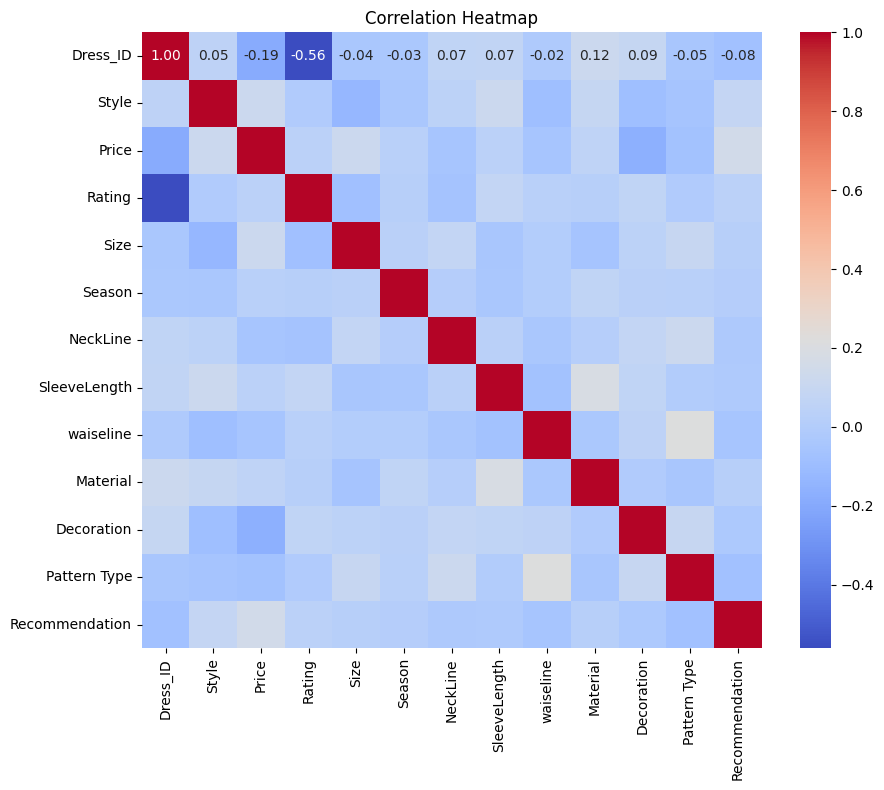

In [19]:
# Calculate correlations
corr = df2.select_dtypes(include=['float64', 'int']).corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


## Training the model

In [14]:
X = df2.drop('Rating', axis=1)  # All other features
y = df2['Rating']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2.52529826


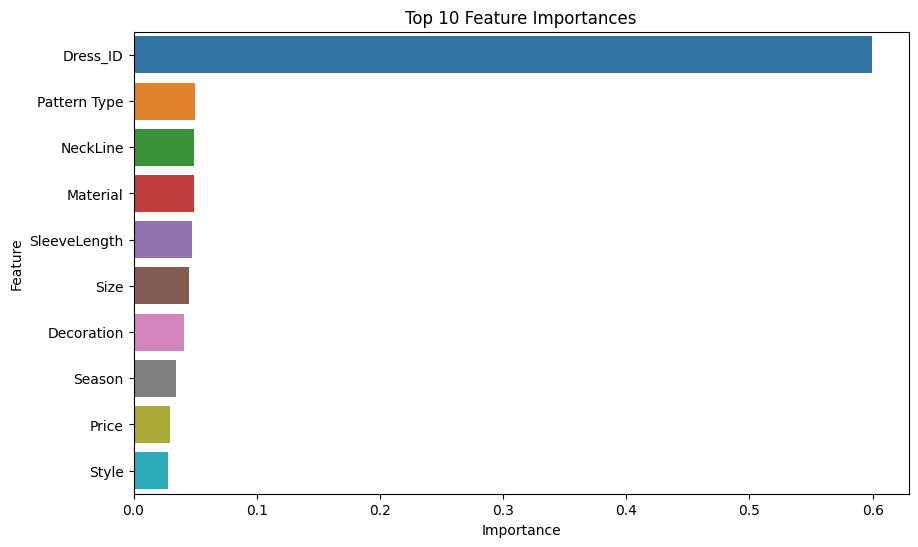

In [16]:
# the model is  trained RandomForestRegressor 
feature_importances = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

## For the classification problem

In [21]:

# Separate features and target variable
X = df2.drop('Recommendation', axis=1)  # all columns except 'Recommendation'
y = df2['Recommendation']                # 'Recommendation' column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.64
[[48 10]
 [26 16]]
              precision    recall  f1-score   support

           0       0.65      0.83      0.73        58
           1       0.62      0.38      0.47        42

    accuracy                           0.64       100
   macro avg       0.63      0.60      0.60       100
weighted avg       0.63      0.64      0.62       100

